In [42]:
#import pandas to read spreadsheet data
import pandas as pd
#import splitting function
from sklearn.model_selection import train_test_split
#import linear regression class
from sklearn.linear_model import LinearRegression
#import matplot to plot the predicted data compaired to true values
import matplotlib.pyplot as plt
#import r-squared value metric to check accuracy of predictions
from sklearn.metrics import r2_score
#import for preprocessing data
from sklearn import preprocessing

In [43]:
#read file data and save to a variable
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
print(data)

        name  year  selling_price  km_driven    fuel seller_type transmission  \
0          1  2013        1550000      75800  Diesel      Dealer    Automatic   
1          1  2017        2750000      13000  Diesel  Individual    Automatic   
2          1  2012        2500000      48000  Diesel      Dealer    Automatic   
3          1  2017        2900000      40000  Diesel  Individual    Automatic   
4          1  2013        2000000     167223  Diesel      Dealer    Automatic   
...      ...   ...            ...        ...     ...         ...          ...   
4299  Datsun  2018         400000       4400  Petrol  Individual       Manual   
4300  Datsun  2018         300000      25000  Petrol  Individual    Automatic   
4301  Datsun  2015         310000      32686  Petrol      Dealer       Manual   
4302  Datsun  2017         350000      80000  Petrol  Individual       Manual   
4303  Datsun  2017         350000      10171  Petrol      Dealer       Manual   

      owner  Ave_cost  
0  

In [44]:
#manipulate data and convert categoric features into numeric value
data['fuel'] = data['fuel'].astype('category')
data['fuel'] = data['fuel'].cat.codes
data['seller_type'] = data['seller_type'].astype('category')
data['seller_type'] = data['seller_type'].cat.codes
data['transmission'] = data['transmission'].astype('category')
data['transmission'] = data['transmission'].cat.codes
data['name'] = data['name'].astype('category')
data['name'] = data['name'].cat.codes
print (data)

      name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0        0  2013        1550000      75800     1            0             0   
1        0  2017        2750000      13000     1            1             0   
2        0  2012        2500000      48000     1            0             0   
3        0  2017        2900000      40000     1            1             0   
4        0  2013        2000000     167223     1            0             0   
...    ...   ...            ...        ...   ...          ...           ...   
4299    12  2018         400000       4400     4            1             1   
4300    12  2018         300000      25000     4            1             0   
4301    12  2015         310000      32686     4            0             1   
4302    12  2017         350000      80000     4            1             1   
4303    12  2017         350000      10171     4            0             1   

      owner  Ave_cost  
0         2   2945385  
1  

In [45]:
#check for any null values
data.isnull().sum()
#none means ready for regression

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
Ave_cost         0
dtype: int64

In [46]:
#Set X to be all independent variables/features x1 through xn
X = data.drop(columns = "selling_price").drop(columns = "name")
Y = data["selling_price"]
print (X)
print (Y)

      year  km_driven  fuel  seller_type  transmission  owner  Ave_cost
0     2013      75800     1            0             0      2   2945385
1     2017      13000     1            1             0      1   2945385
2     2012      48000     1            0             0      1   2945385
3     2017      40000     1            1             0      1   2945385
4     2013     167223     1            0             0      1   2945385
...    ...        ...   ...          ...           ...    ...       ...
4299  2018       4400     4            1             1      2    297027
4300  2018      25000     4            1             0      1    297027
4301  2015      32686     4            0             1      1    297027
4302  2017      80000     4            1             1      1    297027
4303  2017      10171     4            0             1      1    297027

[4304 rows x 7 columns]
0       1550000
1       2750000
2       2500000
3       2900000
4       2000000
         ...   
4299     400000

In [47]:
#split the data into a training set and testing set for associated X and Y values 20% saved for testing (random state is given to make split reproduceable)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [48]:
#create linear regression type object
lr = LinearRegression()
#fit it to the training set
lr.fit(X_train, Y_train)

LinearRegression()

In [49]:
#predict outputs of dependent variables for X dataset of feature values using developed linear regression function
Y_pred_train = lr.predict(X_train)
print(Y_pred_train)

[667692.08437124 382243.24380012  81031.65829779 ... 313950.0453628
 294147.10989913 258379.77320828]


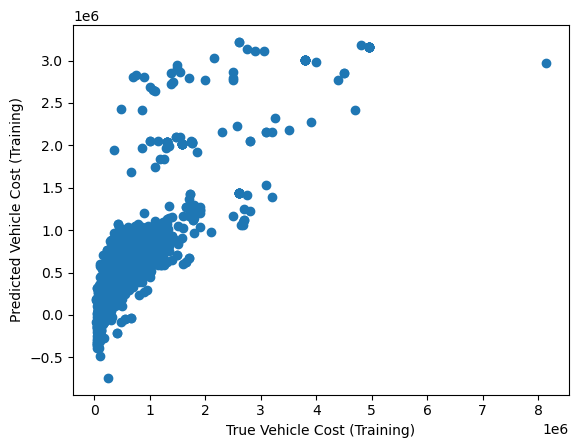

In [50]:
#plot the predicted y-values against true y-values
plt.scatter(Y_train, Y_pred_train)
plt.xlabel("True Vehicle Cost (Training)")
plt.ylabel("Predicted Vehicle Cost (Training)")
plt.show()

In [51]:
#check accuracy of predictions using r-squared value
r2_score(Y_train, Y_pred_train)

0.6866662287306111

In [52]:
#predict outputs of dependent variables for X dataset of feature values using developed linear regression function for test
Y_pred_test = lr.predict(X_test)
print(Y_pred_test)

[ 2.48850885e+05  2.97700770e+05  2.47366248e+05  1.96679685e+05
  5.09704168e+05  6.45557654e+02  7.26802135e+05  3.25257298e+05
 -5.60489949e+03  4.08264708e+05  5.13715393e+05  4.01629286e+05
  5.73277494e+05  7.05110976e+05  4.87835494e+05  5.34950586e+05
  8.35630495e+05 -1.55456105e+05  3.08118021e+05  5.98118496e+05
  2.75901648e+04  4.28234040e+05  2.18985748e+05  3.37983158e+05
  1.09208968e+05  6.96935090e+05  3.98494335e+05  2.58004275e+05
  6.35778555e+05  1.76824519e+05  1.96273856e+05  4.92388690e+05
  5.79778744e+05  5.20000696e+05  1.00435095e+06  9.53103420e+04
  7.64589912e+05  5.06169419e+05  3.25015067e+05 -1.11492045e+05
  4.99661356e+05 -1.15592150e+05  5.00770331e+05  8.08924602e+05
  3.63024695e+05  1.52369539e+05  8.48185577e+05  8.55815174e+05
  7.18606326e+05  2.11455476e+05  2.77042265e+05  2.45586350e+05
  5.13276509e+05  2.19228161e+05  5.17234440e+05  7.39023987e+05
  1.95613481e+05  5.19848111e+05  2.94295889e+05  5.40550565e+05
  6.22904144e+05  4.68516

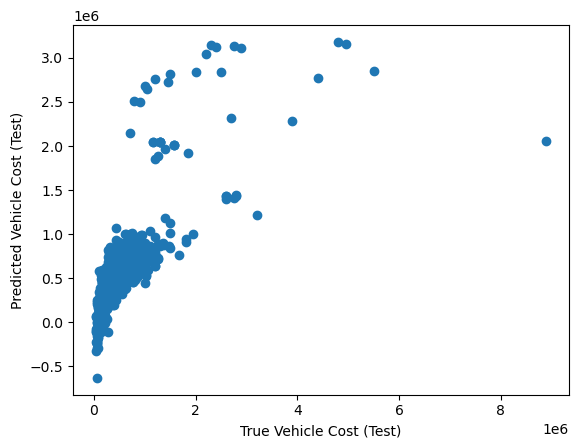

In [53]:
#plot the predicted y-values against true y-values
plt.scatter(Y_test, Y_pred_test)
plt.xlabel("True Vehicle Cost (Test)")
plt.ylabel("Predicted Vehicle Cost (Test)")
plt.show()

In [54]:
#check accuracy of test predictions using r-squared value
r2_score(Y_test, Y_pred_test)

0.5633892385615547